# Sentinel 3 OLCI

`Sentinel-3 Ocean and Land Colour Instrument (OLCI) - Level 1B` allows for Red Green Blue composites. It has imagery from 21 channels. Using 17/5/2 as R/G/B highlights smoke plumes vs healthy vegetation. (8/6/4 would be true colours) 

OLCI data are available in EFR/ERR (full- or reduced-resolution) which are calibrated radiance (Level-1B product), and in WFR/WRR which are geophysical parameters (Level-2).

Looking up OLCI Level-1 EFR data from 2022-07-12 to 2022-07-28 at https://browser.dataspace.copernicus.eu/ we can visualise images. PS1 are Sentinel-3A images, PS2 are Sentinel-3B. NR are Near-Real-Time images (typically published 3h after acquisition). NT are Non-Time-Critical and have better auxiliary data.

e.g.

`S3A_OL_1_EFR____20220718T102425_20220718T102725_20220718T122517_0179_087_336_2160_PS1_O_NR_002.SEN3`

`S3A_OL_1_EFR____20220718T102425_20220718T102725_20220719T104605_0180_087_336_2160_PS1_O_NT_002.SEN3`

`S3B_OL_1_EFR____20220717T101127_20220717T101427_20220717T121748_0180_068_179_2160_PS2_O_NR_002.SEN3`

`S3B_OL_1_EFR____20220717T101127_20220717T101427_20220717T230011_0180_068_179_2160_PS2_O_NT_002.SEN3`

Other dates:

`S3B_OL_1_EFR____20220716T103737_20220716T104037_20220716T230508_0179_068_165_2160_PS2_O_NT_002.SEN3`

`S3A_OL_1_EFR____20220715T100159_20220715T100459_20220716T102912_0179_087_293_2160_PS1_O_NT_002.SEN3`

`S3A_OL_1_EFR____20220714T102810_20220714T103110_20220715T105728_0179_087_279_2160_PS1_O_NT_002.SEN3`

`S3B_OL_1_EFR____20220714T094900_20220714T095200_20220714T204639_0179_068_136_2160_PS2_O_NT_002.SEN3`

`S3A_OL_1_EFR____20220713T105421_20220713T105721_20220714T112250_0179_087_265_2160_PS1_O_NT_002.SEN3`

`S3B_OL_1_EFR____20220713T101511_20220713T101811_20220713T231026_0179_068_122_2160_PS2_O_NT_002.SEN3`

`S3B_OL_1_EFR____20220712T104121_20220712T104421_20220712T230618_0180_068_108_2160_PS2_O_NT_002.SEN3`

## Browse the available files

Let's see which files are present in the unzipped archive:

In [2]:
import glob

olci_efr_dir = 'S3A_OL_1_EFR____20220718T102425_20220718T102725_20220719T104605_0180_087_336_2160_PS1_O_NT_002.SEN3/'

for f in sorted(glob.glob(olci_efr_dir+'*')):
    print(f.split('/')[-1])

Oa01_radiance.nc
Oa02_radiance.nc
Oa03_radiance.nc
Oa04_radiance.nc
Oa05_radiance.nc
Oa06_radiance.nc
Oa07_radiance.nc
Oa08_radiance.nc
Oa09_radiance.nc
Oa10_radiance.nc
Oa11_radiance.nc
Oa12_radiance.nc
Oa13_radiance.nc
Oa14_radiance.nc
Oa15_radiance.nc
Oa16_radiance.nc
Oa17_radiance.nc
Oa18_radiance.nc
Oa19_radiance.nc
Oa20_radiance.nc
Oa21_radiance.nc
S3A_OL_1_EFR____20220718T102425_20220718T102725_20220719T104605_0180_087_336_2160_PS1_O_NT_002-ql.jpg
geo_coordinates.nc
instrument_data.nc
qualityFlags.nc
removed_pixels.nc
tie_geo_coordinates.nc
tie_geometries.nc
tie_meteo.nc
time_coordinates.nc
xfdumanifest.xml


## 1. Read a radiance file as an array

This requires `xarray` and `h5netcdf` to be installed.

Here we load the file radiance channel:

In [3]:
import xarray as xr
olci_xr = xr.open_dataset(olci_efr_dir+'Oa01_radiance.nc')
olci_xr

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa01_radiance  (rows, columns) float32 80MB ...
Attributes: (12/17)
    absolute_orbit_number:  33419
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2022-07-19T10:46:05Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r5 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.13
    start_time:             2022-07-18T10:24:24.703667Z
    stop_time:              2022-07-18T10:27:24.624656Z
    title:                  OLCI Level 1b Product, Radiance Oa01 Data Set

## 2. Load all channels at once

Requires the `dask` package.

In [4]:
%%time

olci_xr_channels = xr.open_mfdataset(olci_efr_dir+'*_radiance.nc', combine='by_coords')
olci_xr_channels

CPU times: user 151 ms, sys: 11.5 ms, total: 163 ms
Wall time: 163 ms


<xarray.Dataset> Size: 2GB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables: (12/21)
    Oa01_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa02_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa03_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa04_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa05_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa06_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    ...             ...
    Oa16_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa17_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa18_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa19_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa20_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa21_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
Attributes: (12/17)
    absolute_orbit_number:  33419
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2022-07-19T10:46:05Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r5 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.13
    start_time:             2022-07-18T10:24:24.703667Z
    stop_time:              2022-07-18T10:27:24.624656Z
    title:                  OLCI Level 1b Product, Radiance Oa01 Data Set

## 3. Visualise individual channels

Tip: use `[::-1]` to flip the histogram upside down.

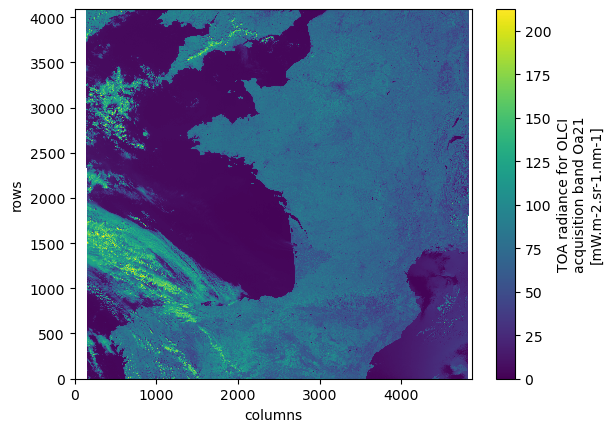

In [5]:
import matplotlib.pyplot as plt

olci_xr_channels['Oa21_radiance'][::-1].plot.imshow()

## 4. Combine channels into RGB images

Using channels 8/6/4 is close to true colours.

For RGB data, `imshow` only takes integers up to 255 and floats up to 1 (values above are clipped), so we normalise every channel so that the radiance goes from 0 to 1.

In [6]:
def normalise(radiance_array):
    """
    Input: numpy array or xarray
    Output: the scaled and normalised array, with values ranging from 0 to 1.
    """
    amin = radiance_array.min()
    amax = radiance_array.max()
    return (radiance_array-amin)/(amax-amin)

In [7]:
# Define channel numbers
R, G, B = 8, 6, 4

# Grab channels
R_radiance = normalise(olci_xr_channels[f'Oa{R:02}_radiance'])
G_radiance = normalise(olci_xr_channels[f'Oa{G:02}_radiance'])
B_radiance = normalise(olci_xr_channels[f'Oa{B:02}_radiance'])

We display three different versions of the image:

* the normalised RGB

* the brighter RGB (where clouds with large white areas where the radiance is saturated)

* the RGB after histogram equalisation (from the `skimage` package)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

rgb = np.dstack((R_radiance, G_radiance, B_radiance))
rgb_eq = exposure.equalize_adapthist(rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.0].


Text(0.5, 1.0, 'normalised+equalised+boosted')

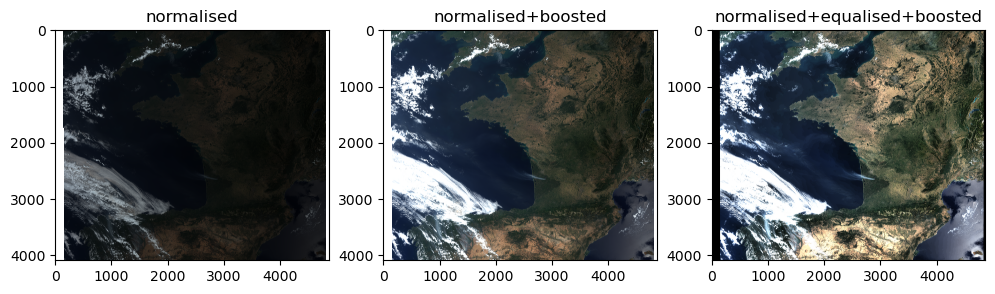

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.imshow(rgb)
plt.title('normalised')

plt.subplot(132)
plt.imshow(3*rgb)
plt.title('normalised+boosted')

plt.subplot(133)
plt.imshow(3*rgb_eq)
plt.title('normalised+equalised+boosted')

## 5. Add geographical coordinates

They can be read from another file in the archive:

In [10]:
olci_geo_coords = xr.open_dataset(olci_efr_dir+'geo_coordinates.nc')
olci_geo_coords

<xarray.Dataset> Size: 398MB
Dimensions:    (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    altitude   (rows, columns) float32 80MB ...
    latitude   (rows, columns) float64 159MB ...
    longitude  (rows, columns) float64 159MB ...
Attributes: (12/17)
    absolute_orbit_number:  33419
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2022-07-19T10:46:05Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r5 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.13
    start_time:             2022-07-18T10:24:24.703667Z
    stop_time:              2022-07-18T10:27:24.624656Z
    title:                  OLCI Level 1b Product, Geo Coordinates Data Set

In [11]:
lat = olci_geo_coords.latitude.data
lon = olci_geo_coords.longitude.data
print(lat.shape,lon.shape)

(4090, 4865) (4090, 4865)


# 6. Display with geographical coordinates

Requires `cartopy`.

In [12]:
rgb_to_plot = 3*rgb_eq[:,:,:] # make a copy
rgb_to_plot[ rgb_to_plot>1 ] = 1 # imshow handles saturated values but pcolormesh doesn't

/var/folders/k7/66g0jm190792cl33xj3stcy08wrsw2/T/ipykernel_6321/4102670680.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon, lat, rgb_to_plot)


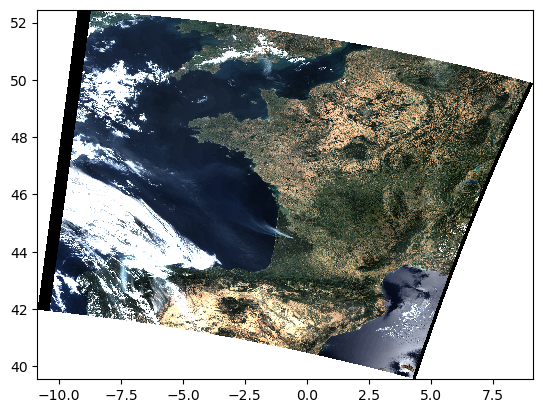

In [13]:
# Simplest plot:
plt.figure()
plt.pcolormesh(lon, lat, rgb_to_plot)

In [14]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

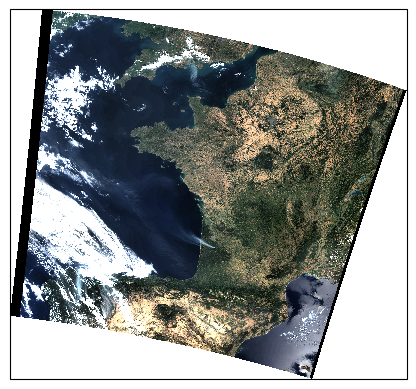

In [15]:
ax=plt.axes(projection=ccrs.Mercator())
plt.pcolormesh(lon, lat, rgb_to_plot,
                          clip_on = True,
                          edgecolors=None,
                          zorder=0,
                          transform=ccrs.PlateCarree())

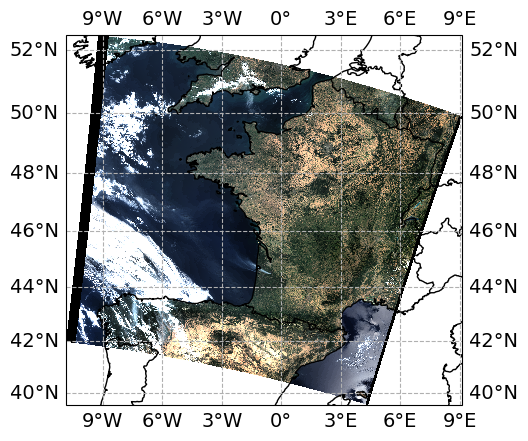

In [16]:
ax=plt.axes(projection=ccrs.Mercator())
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)

gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}


plt.pcolormesh(lon, lat, rgb_to_plot,
                          clip_on = True,
                          edgecolors=None,
                          zorder=0,
                          transform=ccrs.PlateCarree())

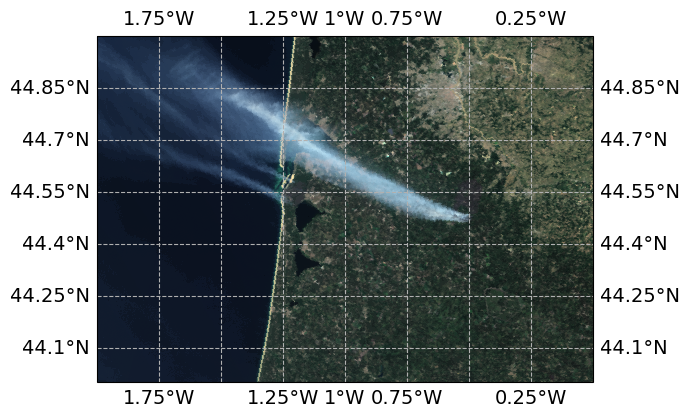

In [17]:
ax=plt.axes(projection=ccrs.Mercator())
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
#ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)


gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}


plt.pcolormesh(lon, lat, rgb_to_plot,
                          clip_on = True,
                          edgecolors=None,
                          zorder=0,
                          transform=ccrs.PlateCarree())

ax.set_extent([-2,0,44,45])

## 7. Other channel combination

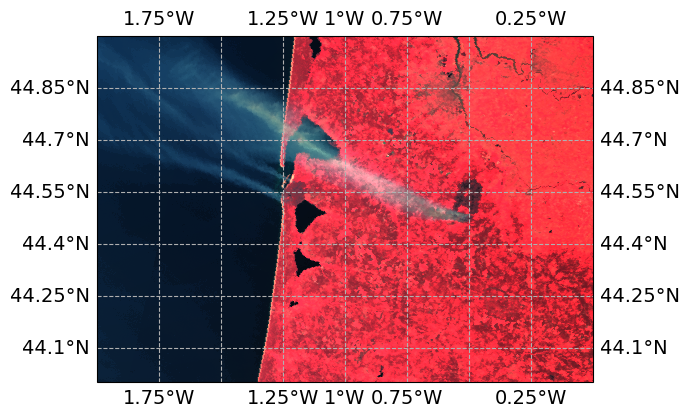

In [18]:
# Define channel numbers
R, G, B = 17, 5, 2

# Grab channels
R_radiance = normalise(olci_xr_channels[f'Oa{R:02}_radiance'])
G_radiance = normalise(olci_xr_channels[f'Oa{G:02}_radiance'])
B_radiance = normalise(olci_xr_channels[f'Oa{B:02}_radiance'])

rgb = np.dstack((R_radiance, G_radiance, B_radiance))
rgb_eq = exposure.equalize_adapthist(rgb)

rgb_to_plot = 3*rgb_eq[:,:,:] # make a copy
rgb_to_plot[ rgb_to_plot>1 ] = 1 # imshow handles saturated values but pcolormesh doesn't

ax=plt.axes(projection=ccrs.Mercator())
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
#ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)


gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}


plt.pcolormesh(lon, lat, rgb_to_plot,
                          clip_on = True,
                          edgecolors=None,
                          zorder=0,
                          transform=ccrs.PlateCarree())

ax.set_extent([-2,0,44,45])